### Exercise 4.2: Predicting Fuel Efficiency
### Author: Anjani Bonda
### Date: July 03, 2022

1. Load the auto-mpg data as a Pandas data frame and ensure that it is imported correctly.

In [1]:
# Import the required libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [28]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


2. Begin by prepping the data for modeling:
    Remove the car name column.
    The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
    Create dummy variables for the origin column.

In [29]:
# Check the data frame shape
df.shape

(398, 9)

In [30]:
# Check for missing values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [31]:
# Remove the car name column
df.drop(columns = 'car name', inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [32]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [34]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

The column 'horsepower' is string as it has values "?"

In [37]:
# Replace the values "?" with NaN, convert the datatype to float and then replace NaN with column mean

df['horsepower'] = df['horsepower'].replace('?', np.NaN)
df['horsepower'] = pd.to_numeric(df['horsepower'])
hpmean = df['horsepower'].mean()
df['horsepower'] = round(df['horsepower'].replace(np.NaN, hpmean), 1)
df.horsepower.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. , 104.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [38]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [42]:
# Understand 'Origin' column and create dummy variables

df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [48]:
df[['origin1', 'origin2', 'origin3']] = pd.get_dummies(df['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin1,origin2,origin3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0


In [53]:
# Remove the 'origin' column now
df.drop(columns = "origin", inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin1,origin2,origin3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [54]:
corrmatrix = df.corr()
corrmatrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin1,origin2,origin3
mpg,1.000000,-0.775396,-0.804203,-0.771430,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838931,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893639,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.771430,0.838931,0.893639,1.000000,0.860568,-0.684251,-0.411644,0.486084,-0.281253,-0.321331
weight,-0.831741,0.896017,0.932824,0.860568,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684251,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411644,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin1,-0.568192,0.604351,0.651407,0.486084,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin2,0.259022,-0.352861,-0.373886,-0.281253,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin3,0.442174,-0.396479,-0.433505,-0.321331,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


Text(0.5, 1.0, 'Correlation Heatmap of Automobile Data')

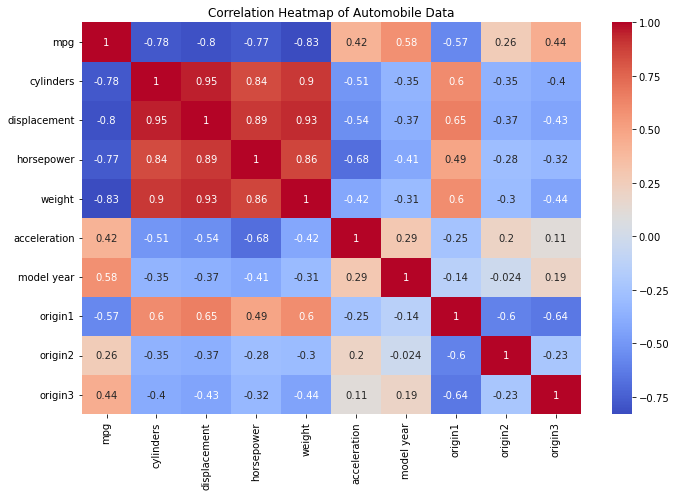

In [55]:
# Display a correlation heatmap. Utilize sns.heatmap() to generate the map.

fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
sns.heatmap(corrmatrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Automobile Data')

Based on above correlation coefficient heatmap,  some of the features highly correlated with mpg are 'weight', 
'displacement', 'cylinders' and 'horse power'.


4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

Text(0.5, 1.0, 'Scatter Plot of Mpg vs. Weight')

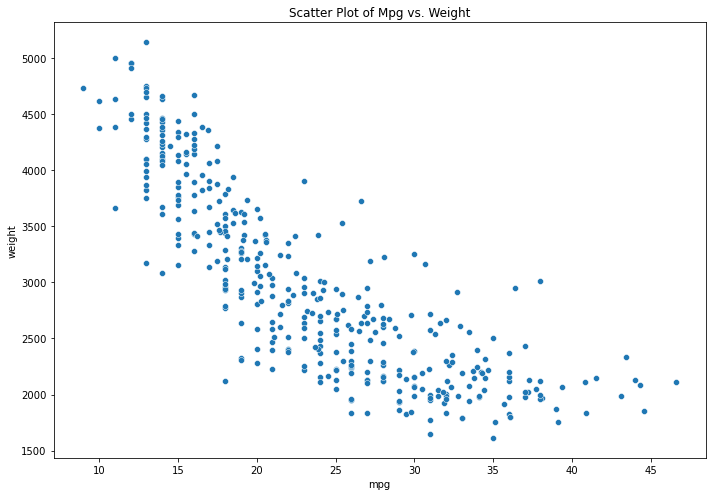

In [56]:
# Plot the age mpg vs weight on a scatter plot. This has the highest correlation based on the heatmap above. 


fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
sns.scatterplot(x='mpg', y='weight', data=df)
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('Scatter Plot of Mpg vs. Weight')

Mpg and weight have a strong negative correlation. This is evident from the scatter plot above 
since mpg decreases as weight increases.
The graph shows that a linear trend exists between these two variables.

5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [58]:
# Define the target variable as y (mpg) and independent variables as X. 

x = df.drop('mpg', axis = 1)
y = df['mpg']

In [59]:
# Show the x data frame for the independent variables cylinders, displacement, horsepower,
# weight, acceleration, model year, origin_1, origin_2, origin_3.

x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin1,origin2,origin3
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0


In [60]:
# Show the y data frame for the target variable mpg.
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [61]:
# Split the data with train_test_split from sklearn.
# Use test_size = 0.2 to split the data into 80% training and 20% testing data.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [62]:
x_train.shape

(318, 9)

In [63]:
x_test.shape

(80, 9)

In [64]:
y_train.shape

(318,)

In [65]:
y_test.shape

(80,)

6. Train an ordinary linear regression on the training data.

In [66]:
# Create the linear regression model with the training data.

regressor = linear_model.LinearRegression()
model = regressor.fit(x_train, y_train)
model

LinearRegression()

In [67]:
# View the coefficients of the model.

model.coef_

array([-0.16372399,  0.01958342, -0.01334094, -0.00707283,  0.07336616,
        0.82740156, -1.86402374,  1.07519754,  0.7888262 ])

In [68]:
# Create predictions for mpg based on training data set.

y_predict_trained = regressor.predict(x_train)
y_predict_trained

array([15.09259437, 24.57301858, 35.66525705, 33.92170498, 25.30312209,
       11.56055197, 32.68547385, 30.03467462, 26.33151997,  8.60205582,
       15.93648845, 30.12406295, 27.76243873, 33.15694057, 24.51368841,
       32.38921551, 29.96280404, 23.48313607, 26.37668005, 12.61339798,
       31.179161  , 25.57619395, 18.98862709, 15.0203091 , 19.20945914,
       10.41498261, 27.94638985, 10.53225598, 33.85786815, 35.20205849,
       30.23658836, 27.75735773, 21.151718  , 35.91955212, 26.16086944,
       22.79096204, 26.58757231, 22.70700473, 32.45665453, 22.88547689,
       13.22154097, 23.90801028, 20.52760323, 23.15744696, 19.9365066 ,
       28.77839258, 34.95936296, 27.28551821, 32.34949705, 31.01864194,
       34.52518536, 29.19705892, 33.40515225, 20.88449865, 24.40088961,
       20.67653097, 22.3403681 , 36.46897868, 28.80725506, 33.47053943,
       17.2003994 , 10.26715303, 19.34287394, 22.03541218, 22.64709592,
       28.36668868, 26.75105004, 26.63258394, 26.96582325, 26.26

In [69]:
# Create predictions for mpg based on test data set.

y_predict_test = regressor.predict(x_test)
y_predict_test

array([32.46901872, 29.21922697, 21.22903871, 16.83328838, 12.34583053,
       26.58673878, 27.57857939, 10.08879749, 16.63527408, 21.61345356,
       13.03698072, 35.86819581, 24.54814804, 13.53765365, 23.51470522,
        6.26533402, 29.16007651, 24.74046175, 16.73184174, 36.01024276,
       24.7063213 , 18.57842885, 28.87344914, 28.2899857 , 14.91599278,
       36.00948065, 26.45303084, 24.56510964, 21.92875597,  8.84642202,
       28.13039401, 36.25126585, 20.86673672, 25.47435775, 33.86293754,
       12.22757882, 22.50169618, 21.94271695, 12.15462618, 27.77253511,
       26.0185725 , 28.48404184, 20.98453356,  7.10875713, 23.89878939,
       34.74007107, 27.8573824 , 25.20642955, 23.39034347, 28.57506931,
       22.1670143 , 33.25870091, 32.30808666, 11.13542642, 27.54124983,
       10.13771411, 20.12332327, 29.50899318, 22.68858272, 20.23248413,
       16.36821912, 31.64895378, 23.54931519, 21.33995444, 20.59514599,
       24.89054822, 24.73654494, 32.07392345, 27.59481446, 12.51

7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [70]:
# Calcualte the R-Squared value for the model based on the training data set.

R2_train = r2_score(y_train, y_predict_trained)
print('R-Squared value for model based on training data: {}.'.format(R2_train))

R-Squared value for model based on training data: 0.8188287328017794.


In [71]:
# Calculate the adusted R-Squared value for the model based on the training data set.

n = x_train.shape[0]
p = x_train.shape[1]

adj_R2_train = 1 - (1 - R2_train) * ((n - 1)/(n-p-1))
print('Adjusted R-Squared value: {}'.format(adj_R2_train))

Adjusted R-Squared value: 0.8135347672018314


In [72]:
# Calculate the Root Mean Squared Error for the model based on the training data set.

mse_train = mean_squared_error(y_train, y_predict_trained)
rmse_train = np.sqrt(mse_train)
print('Root Mean Squared Error for model based on training data: {}'.format(rmse_train))

Root Mean Squared Error for model based on training data: 3.370275073571748


In [73]:
# Calculate the Mean Absolute Error for the model based on the training data set.

mae_train = mean_absolute_error(y_train, y_predict_trained)
print('Mean Absolute Error for model based on training data: {}'.format(mae_train))

Mean Absolute Error for model based on training data: 2.6054865691067857


In [74]:
# Calcualte the R-Squared value for the model based on the test data set.
R2_test = r2_score(y_test, y_predict_test)
print('R-Squared value for model based on test data: {}.'.format(R2_test))

R-Squared value for model based on test data: 0.8449005624108854.


In [75]:
# Calculate the adusted R-Squared value for the model based on the test data set.

n = x_test.shape[0]
p = x_test.shape[1]

adj_R2_test = 1 - (1 - R2_test) * ((n - 1)/(n-p-1))

print('Adjusted R-Squared value: {}'.format(adj_R2_test))

Adjusted R-Squared value: 0.8249592061494277


In [76]:
# Calculate the Root Mean Squared Error for the model based on the test data set.

mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error for model based on test data: {}'.format(rmse_test))

Root Mean Squared Error for model based on test data: 2.8877578130431525


In [77]:
# Calculate the Mean Absolute Error for the model based on the test data set.

mae_test = mean_absolute_error(y_test, y_predict_test)
print('Mean Absolute Error for model based on test data: {}'.format(mae_test))

Mean Absolute Error for model based on test data: 2.287585361691413


With regards to the training data set, the R-Squared and adjusted R-Squared values of the model were 0.82 and 0.81 respectively. For the test data set, the R-Squared and adjusted R-Squared values of the model were 0.85 and 0.82 respectively. The model did a good job in explaining the variance for mpg on both training and test datasets, however the R-Squared and adjusted R-Squared values are higher for the model when applied on the test data. The RMSE for the model with the trained data set was 3.37. The RMSE for the model with the test data was 2.89. The standard deviation of the residuals was slightly lower for the model when applied to the test data rather than the training data. The MAE for the model based on the training data was 2.61 whereas the MAE for the model based on test data was 2.29. Therefore, the regression line fits better for the test data compared to the training data.

8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [78]:
# Applying Lasso Regression with an alpha value of 0.5

lasso = Lasso(alpha = 0.5)
model_lasso = lasso.fit(x_train,y_train)
model_lasso

Lasso(alpha=0.5)

In [79]:
# View the coefficients of the lasso regression model.

model_lasso.coef_

array([ 0.00000000e+00,  1.95656408e-04, -3.98395481e-03, -6.67039306e-03,
        0.00000000e+00,  7.50105424e-01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [80]:
# Create predictions for mpg for lasso model based on training data set.

y_predict_lasso_trained = lasso.predict(x_train)
y_predict_lasso_trained

array([15.7706403 , 24.66866679, 34.4488283 , 32.98111668, 24.63272635,
       10.8398211 , 31.77642207, 31.3440548 , 25.92509449,  7.72185673,
       14.93081248, 30.18221686, 26.78772094, 32.06987147, 23.76484951,
       33.80444796, 31.05849737, 23.90077851, 27.64437417, 12.97785721,
       32.95858255, 25.23630368, 20.35703501, 15.67662721, 19.51644972,
        9.67501701, 26.80375884, 10.33534457, 32.57694348, 34.04302046,
       29.71672794, 26.95131252, 21.46664109, 34.85303584, 27.85417074,
       24.31495368, 25.85082393, 23.15242915, 31.4941368 , 21.96504241,
       12.83300157, 25.18346304, 21.65240163, 23.82462221, 21.22539222,
       27.68596466, 33.9655386 , 28.2028071 , 33.77519068, 29.61155342,
       33.36031018, 28.62105599, 32.39241197, 21.22694471, 23.89533969,
       20.97361681, 22.0822845 , 35.49629211, 30.54616033, 32.43994298,
       17.63100697, 10.77268659, 18.42034251, 21.65570854, 22.81751966,
       29.94406117, 25.47720336, 26.94575478, 28.7584577 , 25.61

In [81]:
# Create predictions for mpg for lasso model based on test data set.

y_predict_lasso_test = lasso.predict(x_test)
y_predict_lasso_test

array([31.54214549, 30.408443  , 22.03550026, 16.89212275, 12.66069974,
       26.36898943, 28.75967038,  9.10375701, 16.98979113, 22.654063  ,
       12.84655465, 34.85303584, 26.65662824, 14.20914073, 24.98109118,
        6.26434569, 30.71649367, 23.79792018, 15.6710433 , 34.81569992,
       23.67996109, 19.97125408, 28.89810346, 30.3063918 , 15.37730846,
       33.81335425, 26.01070774, 25.86103043, 22.03542118,  8.14652337,
       29.28385359, 34.72783145, 19.51511462, 25.15690228, 32.9996134 ,
       12.08454107, 24.57336156, 21.84496227, 12.419938  , 27.09553893,
       27.52479466, 27.50475929, 20.72163284,  7.6382354 , 23.62945435,
       33.47432018, 26.95083177, 24.70764023, 23.0079024 , 27.86520499,
       23.63655944, 32.54300527, 31.16815798, 10.53325723, 28.87816546,
        9.56275462, 19.15065659, 28.29349403, 24.52538486, 20.85212451,
       16.36957733, 30.79204006, 25.05229684, 20.51419797, 21.74797244,
       24.74031651, 25.85599252, 33.57863648, 29.05425236, 12.91

In [82]:
# Calcualte the R-Squared value for the lasso model based on the training data set.

R2_lasso_train = r2_score(y_train, y_predict_lasso_trained)
print('R-Squared value for lasso model based on training data: {}.'.format(R2_lasso_train))

R-Squared value for lasso model based on training data: 0.8031762803610885.


In [83]:
# Calculate the adusted R-Squared value for the lasso model based on the training data set.

n = x_train.shape[0]
p = x_train.shape[1]

adj_R2_lasso_train = 1 - (1 - R2_lasso_train) * ((n - 1)/(n-p-1))

print('Adjusted R-Squared value for the lasso model: {}'.format(adj_R2_lasso_train))

Adjusted R-Squared value for the lasso model: 0.7974249379041073


In [84]:
# Calculate the Root Mean Squared Error for the lasso model based on the training data set.

mse_lasso_train = mean_squared_error(y_train, y_predict_lasso_trained)
rmse_lasso_train = np.sqrt(mse_lasso_train)
print('Root Mean Squared Error for lasso model based on training data: {}'.format(rmse_lasso_train))

Root Mean Squared Error for lasso model based on training data: 3.512848375862273


In [85]:
# Calculate the Mean Absolute Error for the lasso model based on the training data set.

mae_lasso_train = mean_absolute_error(y_train, y_predict_lasso_trained)
print('Mean Absolute Error for lasso model based on training data: {}'.format(mae_lasso_train))

Mean Absolute Error for lasso model based on training data: 2.685179009171527


In [86]:
# Calcualte the R-Squared value for the lasso model based on the test data set.

R2_lasso_test = r2_score(y_test, y_predict_lasso_test)
print('R-Squared value for lasso model based on test data: {}.'.format(R2_lasso_test))

R-Squared value for lasso model based on test data: 0.8280285799291084.


In [87]:
# Calculate the adusted R-Squared value for the lasso model based on the test data set.

n = x_test.shape[0]
p = x_test.shape[1]

adj_R2_lasso_test = 1 - (1 - R2_test) * ((n - 1)/(n-p-1))

print('Adjusted R-Squared value for the lasso model: {}'.format(adj_R2_lasso_test))

Adjusted R-Squared value for the lasso model: 0.8249592061494277


In [88]:
# Calculate the Root Mean Squared Error for the lasso model based on the test data set.

mse_lasso_test = mean_squared_error(y_test, y_predict_lasso_test)
rmse_lasso_test = np.sqrt(mse_lasso_test)
print('Root Mean Squared Error for lasso model based on test data: {}'.format(rmse_lasso_test))

Root Mean Squared Error for lasso model based on test data: 3.0407715606156964


In [89]:
# Calculate the Mean Absolute Error for the lasso model based on the test data set.

mae_lasso_test = mean_absolute_error(y_test, y_predict_lasso_test)
print('Mean Absolute Error for lasso model based on test data: {}'.format(mae_lasso_test))

Mean Absolute Error for lasso model based on test data: 2.4329569993418234


With regards to the training data set, the R-Squared and adjusted R-Squared values of the model were 0.80 and 0.79 respectively. For the test data set, the R-Squared and adjusted R-Squared values of the model were both 0.83. The R-Squared and adjusted R-Squared measures are slightly lower on the trained dataset compared to the test data set. The RMSE for the model with the trained data set was 3.51. The RMSE for the model with the test data was 3.04. The standard deviation of the residuals was slightly lower for the lasso model when applied to the test data rather than the training data. The MAE for the lasso model based on the training data was 2.69 whereas the MAE for the model based on test data was 2.43. The regression line fits better for the test data compared to the training data (similar to the intitial regression model). The lasso regression model eliminated five of the coefficients for the regression equation based on an alpha value of 0.5.